___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression with Python

** This is mostly just code for reference. Please watch the video lecture for more info behind all of this code.**

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [31]:
Binghamtonhousing = pd.read_csv('351Bing_Complete_Modified.csv')

In [3]:
Binghamtonhousing.head()

,Unnamed: 0,Date,Price,Space Ft2,Bedroom,Bathroom,Furnished,Laundry,Housing Type,Parking,...,LivingWall,LivingFloor,LivingFurn,BedWall,BedFloor,BedFurn,BathWall,BathFloor,BathFurn,Student Housing
0,0,112917,650,850,20,10,0,0,1,0,...,3,3,2,3,3,2,3,3,2,1
1,1,121217,650,600,10,10,0,3,1,4,...,3,3,2,3,3,2,3,3,2,2
2,3,121217,1100,2120,30,15,0,2,1,2,...,3,3,1,2,2,1,3,3,2,2
3,4,120817,900,800,20,10,1,1,1,4,...,3,3,2,3,3,3,3,2,2,1
4,5,111917,2400,2000,30,25,0,4,0,0,...,3,3,2,3,3,2,3,3,2,1


In [4]:
Binghamtonhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 26 columns):
Unnamed: 0         328 non-null int64
Date               328 non-null int64
Price              328 non-null int64
Space Ft2          328 non-null int64
Bedroom            328 non-null int64
Bathroom           328 non-null int64
Furnished          328 non-null int64
Laundry            328 non-null int64
Housing Type       328 non-null int64
Parking            328 non-null int64
Zipcode            328 non-null int64
Exterior           328 non-null int64
KitchenApp         328 non-null int64
KitchenWall        328 non-null int64
KitchenFloor       328 non-null int64
KitchenFurn        328 non-null int64
LivingWall         328 non-null int64
LivingFloor        328 non-null int64
LivingFurn         328 non-null int64
BedWall            328 non-null int64
BedFloor           328 non-null int64
BedFurn            328 non-null int64
BathWall           328 non-null int64
BathFloor          32

In [5]:
Binghamtonhousing.describe()

,Unnamed: 0,Date,Price,Space Ft2,Bedroom,Bathroom,Furnished,Laundry,Housing Type,Parking,...,LivingWall,LivingFloor,LivingFurn,BedWall,BedFloor,BedFurn,BathWall,BathFloor,BathFurn,Student Housing
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,178.359756,99940.935976,1029.771341,1369.685976,28.506098,14.298780,0.274390,2.231707,1.408537,3.079268,...,2.996951,2.719512,1.615854,2.981707,2.640244,1.603659,2.981707,2.984756,2.057927,1.591463
std,103.227897,38835.077949,661.857815,930.242254,17.361773,7.334039,0.446888,1.606933,2.221149,1.571866,...,0.055216,0.456670,0.573624,0.134212,0.493223,0.554315,0.134212,0.145512,0.258787,0.516564
min,0.000000,10118.000000,325.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,86.750000,110317.000000,650.000000,800.000000,20.000000,10.000000,0.000000,1.000000,0.000000,2.000000,...,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000
50%,183.500000,112817.000000,795.000000,1080.000000,20.000000,10.000000,0.000000,2.000000,1.000000,4.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
75%,268.250000,121117.000000,1143.750000,1789.500000,40.000000,20.000000,1.000000,4.000000,1.000000,4.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
max,350.000000,123117.000000,4400.000000,10000.000000,80.000000,50.000000,1.000000,5.000000,10.000000,7.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000


In [32]:
Binghamtonhousing = Binghamtonhousing[['Price', 'Zipcode', 'Space Ft2', 'Bedroom', 'Bathroom',
               'Furnished', 'Laundry','Housing Type','Parking']]

# EDA

Let's create some simple plots to check out the data!

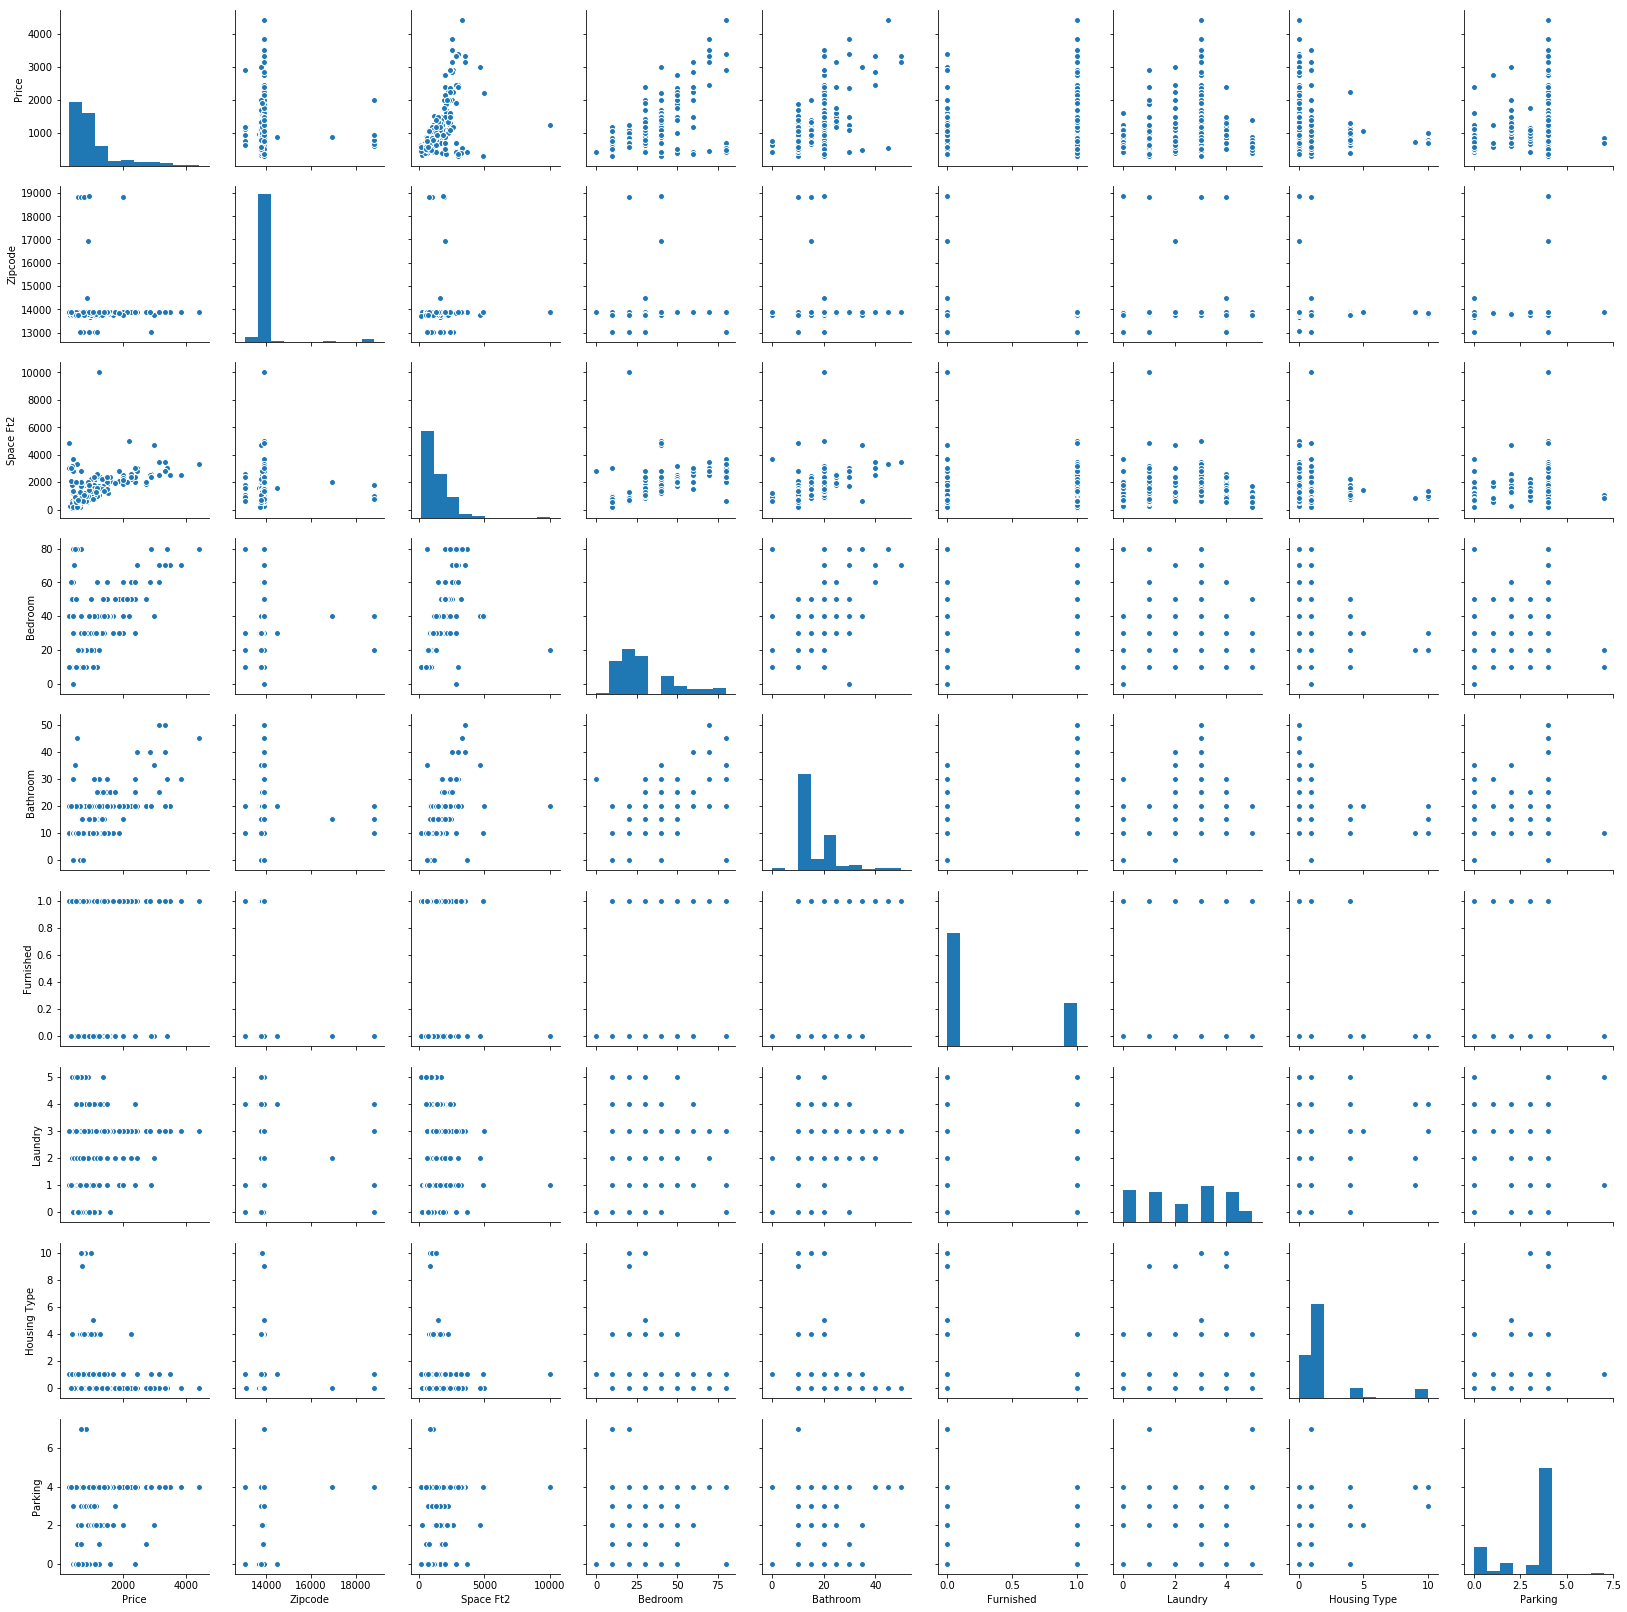

In [33]:
sns.pairplot(Binghamtonhousing)

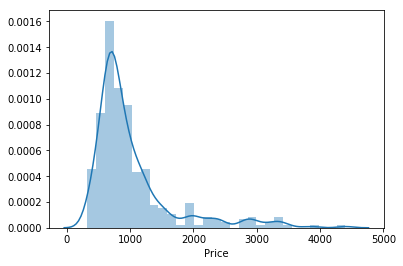

In [34]:
sns.distplot(Binghamtonhousing['Price'])

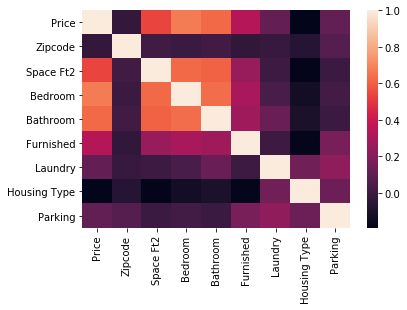

In [35]:
sns.heatmap(Binghamtonhousing.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [14]:
X = Binghamtonhousing[['Zipcode', 'Space Ft2', 'Bedroom', 'Bathroom',
               'Furnished', 'Laundry','Housing Type','Parking']]
y = Binghamtonhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [20]:
# print the intercept
print(lm.intercept_)

657.064859075


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Zipcode,-0.037495
Space Ft2,0.068861
Bedroom,13.327580
Bathroom,19.426416
Furnished,60.931946
Laundry,12.070786
Housing Type,-25.154792
Parking,29.546639


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [22]:
predictions = lm.predict(X_test)

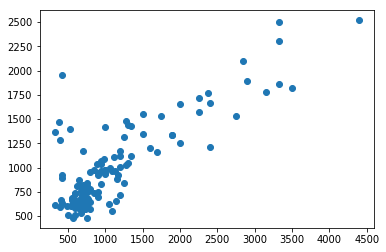

In [23]:
plt.scatter(y_test,predictions)

**Residual Histogram**

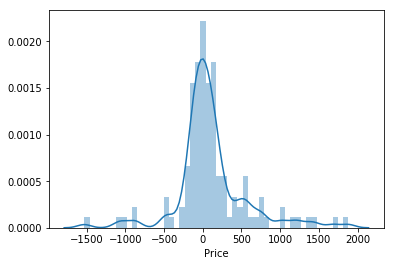

In [24]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [25]:
from sklearn import metrics
import 

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 288.840795761
MSE: 225194.202877
RMSE: 474.546312679


This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now, but go ahead and explore the Boston Dataset mentioned earlier if this particular data set was interesting to you! 

Up next is your own Machine Learning Project!

## Great Job!